# [HSP]: Notebook 2 - Feature Engineering

### Importing libraries

In [1]:
!pip install category_encoders


In [2]:
# Import relevant packages & functions
import seaborn as sns
import pandas as pd
import numpy as np
import os
from scipy import stats
from scipy.stats import mode

#import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.decomposition import PCA, NMF

from sklearn.pipeline import Pipeline,FeatureUnion
# from generic_transformers import *
# from utility_functions import *
from pathlib import Path
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
#from patsylearn import *
#from patsylearn import PatsyTransformer
from category_encoders.one_hot import OneHotEncoder
from sklearn.model_selection import train_test_split
from category_encoders import (BackwardDifferenceEncoder,BinaryEncoder,HashingEncoder,HelmertEncoder,
                               OneHotEncoder
                               ,OrdinalEncoder,SumEncoder,PolynomialEncoder)

### Downloading the dataset

In [3]:
# Set the grid theme

color = sns.color_palette()
sns.set_theme(style="whitegrid")
# Set the directory for plots

report_path = '..//reports//figures//'
data_path = '..//data//raw//'

In [4]:
file_name = "healthcare-dataset-stroke-data.csv"
df = pd.read_csv(data_path+file_name)
df.shape

(5110, 12)

In [5]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Data cleaning

In [6]:
# Replace spaces in column names with underscores

df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = [c.lower() for c in df.columns]

In [7]:
cols_drop = ['id']
df = df.drop(cols_drop, axis=1)

In [8]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [10]:
df['hypertension'] = df['hypertension'].astype(str)
df['heart_disease'] = df['heart_disease'].astype(str)

In [11]:
# Check for duplicates

duplicate = df[df.duplicated()]
 
print("Duplicate Rows {}:".format(duplicate))

Duplicate Rows Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []:


In [12]:
## Check for missing values before imputation
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
## Applying knn imputation for Filling missing values
# KNN Imputation is used to impute the missing values in bmi column

# Select the columns with missing values
columns_with_missing = ['bmi']

# Create a copy of the original dataset
new_df = df.copy()

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation
new_df[columns_with_missing] = imputer.fit_transform(df[columns_with_missing])

# Check the imputed dataset
new_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [14]:
## Check for missing values after imputation
new_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
new_df

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [16]:
y = df['stroke']
input_df = new_df.drop(['stroke'],axis = 1)

In [17]:
# input_df.to_excel(data_path + "processed/" + "strokepred_raw_dataset.xlsx", index=False)

In [18]:
cat_feat= ["gender","work_type","residence_type","smoking_status","ever_married","hypertension","heart_disease"]

num_feat = ["age","avg_glucose_level","bmi"]

#### Encoding Categorical vairables

In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Define the categorical features
cat_feat = ["gender", "work_type", "residence_type", "smoking_status", "ever_married","hypertension","heart_disease"]

# Assuming `input_df` is your DataFrame containing the categorical features

# Select only the categorical columns from the DataFrame
cat_df = input_df[cat_feat]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the categorical DataFrame
encoded_features = encoder.fit_transform(cat_df)

# Get the unique values in each categorical feature
unique_values = [input_df[feat].unique() for feat in cat_feat]

# Generate the feature names for the encoded variables
feature_names = [f"{feat}={val}" for feat, vals in zip(cat_feat, unique_values) for val in vals]

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Concatenate the encoded features with the original DataFrame
df_encoded = pd.concat([input_df.drop(columns=cat_feat), encoded_df], axis=1)


In [20]:
df_encoded

,age,avg_glucose_level,bmi,gender=Male,gender=Female,gender=Other,work_type=Private,work_type=Self-employed,work_type=Govt_job,work_type=children,...,smoking_status=formerly smoked,smoking_status=never smoked,smoking_status=smokes,smoking_status=Unknown,ever_married=Yes,ever_married=No,hypertension=0,hypertension=1,heart_disease=1,heart_disease=0
0,67.0,228.69,36.600000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,61.0,202.21,28.893237,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,80.0,105.92,32.500000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,49.0,171.23,34.400000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,79.0,174.12,24.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,83.75,28.893237,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
5106,81.0,125.20,40.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5107,35.0,82.99,30.600000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5108,51.0,166.29,25.600000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define the numerical columns
num_feat = ["age","avg_glucose_level","bmi"]

# Assuming `df_encoded` is your DataFrame containing the numerical features

# Select only the numerical columns from the DataFrame
num_df = df_encoded[num_feat]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical DataFrame
scaled_features = scaler.fit_transform(num_df)

# Create a DataFrame from the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=num_feat)

# Concatenate the scaled features with the original DataFrame
df_scaled = pd.concat([df_encoded.drop(columns=num_feat), scaled_df], axis=1)

In [22]:
df_scaled

,gender=Male,gender=Female,gender=Other,work_type=Private,work_type=Self-employed,work_type=Govt_job,work_type=children,work_type=Never_worked,residence_type=Urban,residence_type=Rural,...,smoking_status=Unknown,ever_married=Yes,ever_married=No,hypertension=0,hypertension=1,heart_disease=1,heart_disease=0,age,avg_glucose_level,bmi
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.051434,2.706375,1.001234e+00
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.786070,2.121559,4.615554e-16
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.626390,-0.005028,4.685773e-01
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.255342,1.437358,7.154182e-01
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.582163,1.501184,-6.357112e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.626390,-0.494658,4.615554e-16
5106,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.670617,0.420775,1.442949e+00
5107,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-0.363842,-0.511443,2.217363e-01
5108,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.343796,1.328257,-4.278451e-01


In [23]:
df_scaled.columns

Index(['gender=Male', 'gender=Female', 'gender=Other', 'work_type=Private',
       'work_type=Self-employed', 'work_type=Govt_job', 'work_type=children',
       'work_type=Never_worked', 'residence_type=Urban',
       'residence_type=Rural', 'smoking_status=formerly smoked',
       'smoking_status=never smoked', 'smoking_status=smokes',
       'smoking_status=Unknown', 'ever_married=Yes', 'ever_married=No',
       'hypertension=0', 'hypertension=1', 'heart_disease=1',
       'heart_disease=0', 'age', 'avg_glucose_level', 'bmi'],
      dtype='object')

In [24]:
df_scaled.columns = df_scaled.columns.str.replace('=', '_')

# Print the updated column names
print(df_scaled.columns)

Index(['gender_Male', 'gender_Female', 'gender_Other', 'work_type_Private',
       'work_type_Self-employed', 'work_type_Govt_job', 'work_type_children',
       'work_type_Never_worked', 'residence_type_Urban',
       'residence_type_Rural', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'smoking_status_Unknown', 'ever_married_Yes', 'ever_married_No',
       'hypertension_0', 'hypertension_1', 'heart_disease_1',
       'heart_disease_0', 'age', 'avg_glucose_level', 'bmi'],
      dtype='object')


In [25]:
target_variable = "stroke"

In [26]:
df_scaled.to_excel('../data/processed/EDA_feats.xlsx', index=False)

In [27]:
X = df_scaled.copy()

In [28]:
## Test Train Split
train_features,test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.33, random_state=42,  stratify=y)

In [29]:
if 1 == 1:
    FEATS_FOLDER = '../data/processed/'
    train_features.to_csv('../data/processed/Strokepred_train_feats.csv', index=False)
    test_features.to_csv('../data/processed/Strokepred_test_feats.csv', index=False)
    train_labels.to_csv('../data/processed/Strokepred_train_labels.csv', index=False)
    test_labels.to_csv('../data/processed/Strokepred_test_labels.csv', index=False)

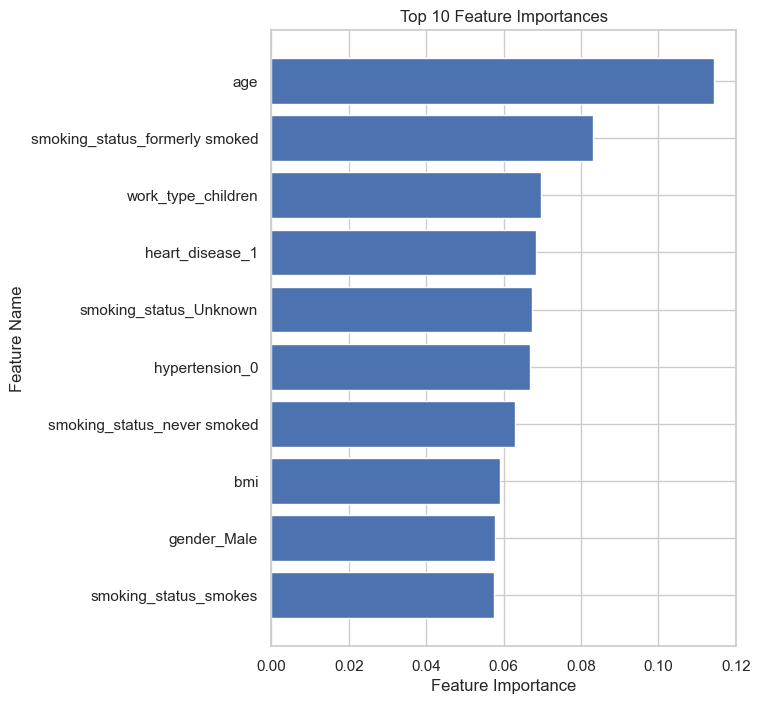

In [30]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Create an instance of XGBClassifier
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss'
)

# Train the XGBoost model
model.fit(train_features, train_labels)

# Get feature importances
importances = model.feature_importances_

# Create a list of feature names
feature_names = train_features.columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]

# Select top 10 feature indices and names
top_indices = sorted_indices[:10]
top_feature_names = feature_names[top_indices]

# Reverse the order of feature importances and feature names
top_indices = top_indices[::-1]
top_feature_names = top_feature_names[::-1]

# Plot feature importances vertically
plt.figure(figsize=(6, 8))
plt.barh(range(len(top_feature_names)), importances[top_indices], align='center')
plt.yticks(range(len(top_feature_names)), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 10 Feature Importances')
plt.show()

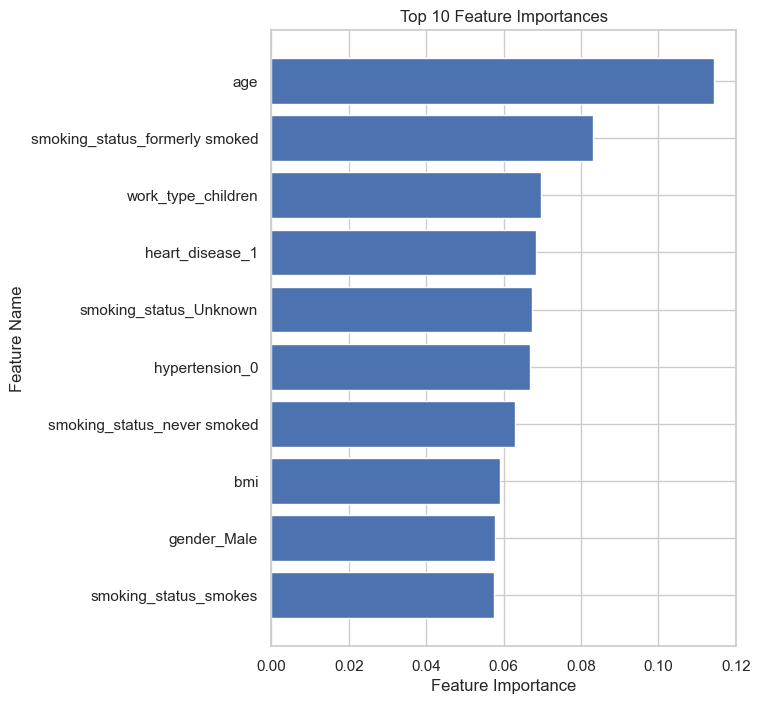

Train F1 Score: 0.996996996996997
Test F1 Score: 0.1320754716981132


In [31]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Create an instance of XGBClassifier
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss'
)

# Train the XGBoost model
model.fit(train_features, train_labels)

# Get feature importances
importances = model.feature_importances_

# Create a list of feature names
feature_names = train_features.columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]

# Select top 10 feature indices and names
top_indices = sorted_indices[:10]
top_feature_names = feature_names[top_indices]

# Reverse the order of feature importances and feature names
top_indices = top_indices[::-1]
top_feature_names = top_feature_names[::-1]

# Plot feature importances vertically
plt.figure(figsize=(6, 8))
plt.barh(range(len(top_feature_names)), importances[top_indices], align='center')
plt.yticks(range(len(top_feature_names)), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 10 Feature Importances')
plt.show()

# Compute F1 score
train_predictions = model.predict(train_features)
f1_train = f1_score(train_labels, train_predictions)

test_predictions = model.predict(test_features)
f1_test = f1_score(test_labels, test_predictions)

print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)


In [32]:
df_scaled

,gender_Male,gender_Female,gender_Other,work_type_Private,work_type_Self-employed,work_type_Govt_job,work_type_children,work_type_Never_worked,residence_type_Urban,residence_type_Rural,...,smoking_status_Unknown,ever_married_Yes,ever_married_No,hypertension_0,hypertension_1,heart_disease_1,heart_disease_0,age,avg_glucose_level,bmi
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.051434,2.706375,1.001234e+00
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.786070,2.121559,4.615554e-16
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.626390,-0.005028,4.685773e-01
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.255342,1.437358,7.154182e-01
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.582163,1.501184,-6.357112e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.626390,-0.494658,4.615554e-16
5106,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.670617,0.420775,1.442949e+00
5107,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-0.363842,-0.511443,2.217363e-01
5108,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.343796,1.328257,-4.278451e-01
